# PRINCIPAL COMPONENT ANALYSIS :-

In [1]:
# Working directory
import os
print('Current working directiry: ', os.getcwd())
print('List of files in working directory : ', os.listdir())

Current working directiry:  C:\Users\Santosh Sharma\Desktop\coursera-machine-learning-stanford\PCA
List of files in working directory :  ['.ipynb_checkpoints', 'bird_small.png', 'ex7data1.mat', 'ex7faces.mat', 'PCA on example dataset.ipynb']


In [3]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.io import loadmat
from skimage import io
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

In [4]:
# Normalize the features in X 
def featureNormalize(X):
    mu = np.zeros(shape = (X.shape[1], 1))
    sigma = np.zeros(shape = (X.shape[1], 1))
    X_norm = np.zeros(shape = (X.shape))
    
    for col in range(X.shape[1]):
        avg = X[:, col].mean()
        sd = X[:, col].std() 
        X_norm[:, col] = (X[:, col] - avg) / sd
        mu[col] = avg
        sigma[col] = sd
        
    return X_norm, mu, sigma 

In [5]:
# PCA
def Pca(X):
    # Initialize values
    m,n = X.shape
    
    # Return
    U = np.zeros(shape = (n,n))
    S = np.zeros(shape = (n))
    
    # Compute co-variance matrix
    cov_matrix = (1/m) * np.dot(X.T, X)
    
    # Compute 'eigenvectors'
    U,S,V = np.linalg.svd(cov_matrix)
    U = U
    S = S
    
    return U,S

In [6]:
# Project data on to the top k eigenvectors
def projectData(X,U,k):
    # Initialize values
    m,n = X.shape
    
    # Return
    Z = np.zeros(shape=(m,k))
    
    # Compute projection of data
    Z = np.dot(X, U[:,:k])
    
    return Z

In [7]:
# Recover an approximation of the original data using projected data
def recoverData(Z, U, k):
    # Return
    X_recover = np.zeros(shape = (Z.shape[1],U.shape[1]))
    u_reduce = U[:,:k]
    
    # compute
    X_recover = np.dot(Z, u_reduce.T)
    
    return X_recover

In [8]:
# connect lines
def connectpoints(X1,X2,p1,p2):
    x1, y1 = X1[:,p1], X1[:,p2]
    x2, y2 = X2[:,p1], X2[:,p2]
    plt.plot([x1,x2],[y1,y2],'--k')

Shape of data (50, 2) 

Data examples
[[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]] 

Visualizing example dataset for PCA...

Running PCA on example dataset.
Top eigenvector:
-0.7071067811865474 , -0.7071067811865474 

Dimension reduction on example dataset...

Projection of the first example:
[1.49631261] 

Approximation of the first example: 
-1.0580527922154779 , -1.0580527922154779 



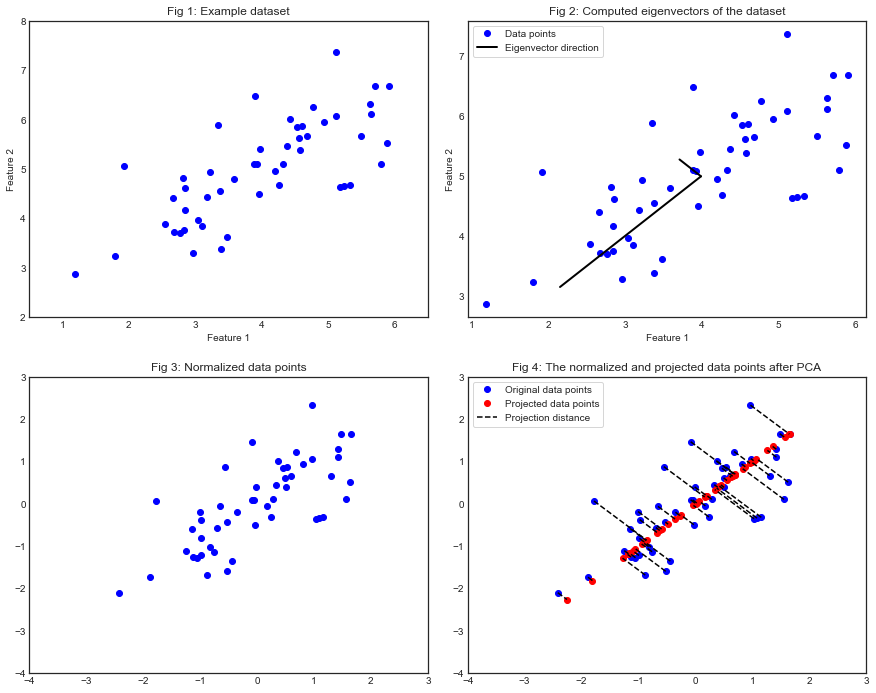

In [9]:
# PART - 1
# Read Data
example_data = loadmat('ex7data1.mat')
X = example_data['X']
print('Shape of data',X.shape,'\n')
print('Data examples')
print(X[:3,:],'\n')

# Visualize example data
print('Visualizing example dataset for PCA...\n')

# Set plot params
fig = plt.figure(figsize=(15,12))
fig.subplots_adjust(hspace = 0.2, wspace = 0.1)

# Fig - 1
# Plot example dataset
fig.add_subplot(2,2,1)
plt.plot(X[:,0], X[:,1], 'bo')
plt.axis([0.5, 6.5, 2, 8])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fig 1: Example dataset')

# PART - 2
#Principal Component Analysis.
print('Running PCA on example dataset.')

# Feature normalization
X_norm, mu, sigma =  featureNormalize(X)

# Run PCA on normalized data
U, S = Pca(X_norm)
print('Top eigenvector:')
print(U[0,0], ',', U[1,0],'\n')

# Fig - 2
# Plot eigenvector
p1 = mu.T + 1.5 * S[0] * U[:,0]
p2 = mu.T + 1.5 * S[1] * U[:,1]

fig.add_subplot(2,2,2)
plt.plot(X[:,0], X[:,1], 'bo')
plt.plot([mu.T[:,0], p1[:,0]],[mu.T[:,1],[p1[:,1]]], '-k',linewidth=2)
plt.plot([mu.T[:,0], p2[:,0]],[mu.T[:,1],[p2[:,1]]], '-k',linewidth=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Data points','Eigenvector direction'], frameon = True)
plt.title('Fig 2: Computed eigenvectors of the dataset')



# PART - 3
# Dimension Reduction
print('Dimension reduction on example dataset...\n')

# fig - 3
# Plot the normalized dataset.
fig.add_subplot(2,2,3)
plt.plot(X_norm[:,0], X_norm[:,1], 'bo')
plt.axis([-4, 3, -4, 3])
plt.title('Fig 3: Normalized data points')


# Project the data onto K = 1 dimension
k = 1
Z = projectData(X_norm, U, k)
print('Projection of the first example:')
print(Z[0,:],'\n')

X_rec  = recoverData(Z, U, k)
print('Approximation of the first example: ')
print(X_rec[0,0],',', X_rec[0,1],'\n')


# Fig - 4
# Visulaizing the projections.
fig.add_subplot(2,2,4)
plt.plot(X_norm[:,0], X_norm[:,1], 'bo')
plt.plot(X_rec[:,0], X_rec[:,1], 'ro')
plt.axis([-4,3,-4,3])
plt.title('Fig 4: The normalized and projected data points after PCA')

#Draw lines connecting the projected points to the original points
connectpoints(X_norm,X_rec,0,1)
plt.legend(['Original data points','Projected data points','Projection distance'], frameon = True);